# Derivación numérica: diferencias finitas

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


Primero definimos la función de la cual encontraremos su derivada

In [62]:
f(x) = 3*x^3-2

f (generic function with 1 method)

In [63]:
f(0)

-2

Definimos la derivada explícita de la función

In [64]:
f1(x) = 9*x^2

f1 (generic function with 1 method)

Posteriormente definimos la derivada derecha de la función


In [65]:
function right_derivate(x,h)
    (f(x+h)-f(x))/h
end

right_derivate (generic function with 1 method)

Hacemos una prueba numérica para comprobar que funcione bien.

In [66]:
right_derivate(1,0.00001)

9.000090000332861

Para poder graficar llamamos a PyPlot.

In [67]:
using PyPlot

Para poder graficar $Err(h)$ definimos dos arreglos, uno para h y otro para el error.

In [68]:
h_values =  logspace(-10,1,100)
rd_error = similar(h_values);

En la celda de abajo evaluamos el error correspondiente para cada valor de h

In [69]:
for (j,h) in enumerate(h_values)
    rd_error[j]=abs(right_derivate(1,h)-9.0)
end

Bajo sugerencia del Profesor se usa la escala logarítmica en ambos ejees para todas las gráficas.

Graficamos el error de la derivada derecha en términos de h

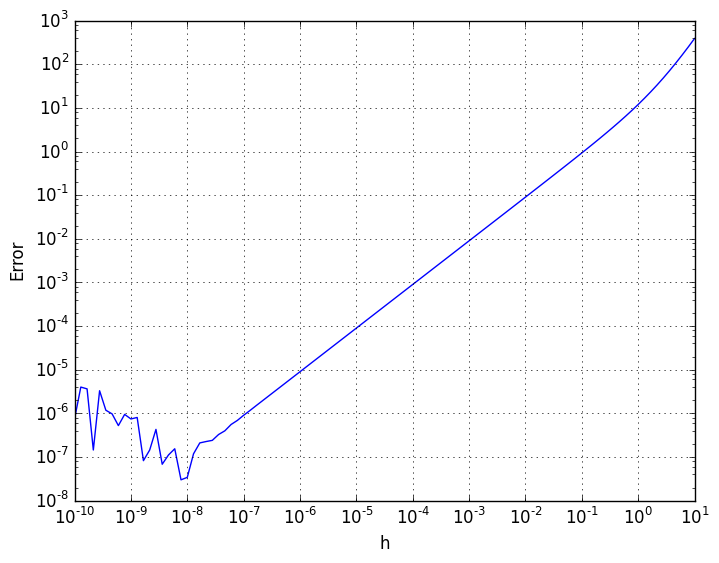

In [92]:
loglog(h_values,rd_error, "b")
xlabel("h")
ylabel("Error")
grid("on")

Lo que encontramos de la gráfica es que para valores de h no tan cercanos a ceros, ie. $h \geq 10^{-7}$ el error se va reduciendo linealmente en escala logarítmica. Sin embargo para valores de $h \approx 10^{-8} $ el error deja de seguir un patrón y empieza a oscilar mientras que, en términos generales, aumenta de nuevo.

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



Definimos la función

In [71]:
function symmetric_derivate(x,h)
    (f(x+h)-f(x-h))/(2h)
end

symmetric_derivate (generic function with 1 method)

Generamos el arreglo para guardar los valores del error

In [72]:
sd_error = similar(h_values);

Asignamos los valores que se obtienen de evular la función de derivada simétrica en $x=1$ para las distintas h

In [101]:
for (j,h) in enumerate(h_values)
    sd_error[j]=abs(symmetric_derivate(1,h)-9.0)
end

Graficamos el error con respecto a h

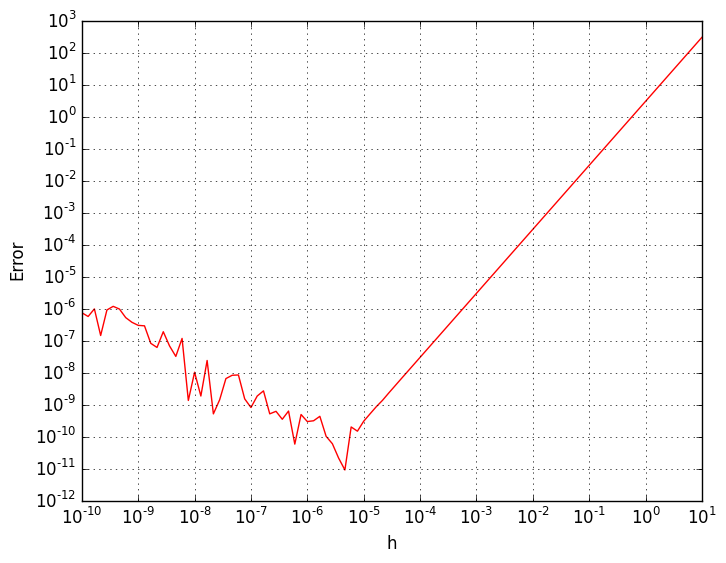

In [102]:
loglog(h_values,sd_error, "r")
xlabel("h")
ylabel("Error")
grid("on")

Esta gráfica es muy similar a la pasada con la única excepción de que el valor de h en el cual deja de reducirse el error ahora se encuentra en $ h < 10^{-5}$

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


Definimos la derivada compleja dentro de Julia

In [76]:
function complex_derivate(x,h)
    imag((f(x+h*im))/h)
end

complex_derivate (generic function with 1 method)

Creamos el arreglo donde guardaremos los valores a graficar del error.

In [121]:
cd_error = similar(h_values);

Asignamos el error correspondiente a cada valor de h

In [122]:
for (j,h) in enumerate(h_values)
    cd_error[j]=abs(complex_derivate(1,h)-9.0)
end

Finalmente graficamos el error de la derivada compleja en función del valor de h

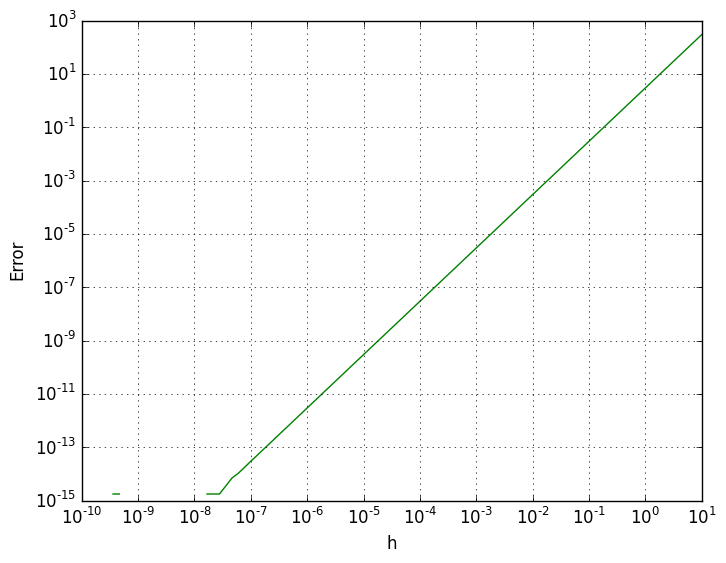

In [123]:
loglog(h_values,cd_error, "g")
xlabel("h")
ylabel("Error")
grid("on")

De manera similar el error decrece conforme h lo hace, sin embargo a diferencia de las otras dos figuras aquí no hay un punto en el que vuelve a aumentar. Parece que de hecho se mantiene constante para $h \leq 10^{-7.5} $, es decir no importa que tan pequeño hagamos h después de cierto punto el error no disminuye ni aumenta.

Bajo este supuesto analizemos el caso para valores de h aún más pequeños.

In [134]:
h_values2 = logspace(-30,-5,100)
cd_error2 = similar(h_values);

for (j,h) in enumerate(h_values2)
    cd_error2[j]=abs(complex_derivate(1,h)-9.0)
end

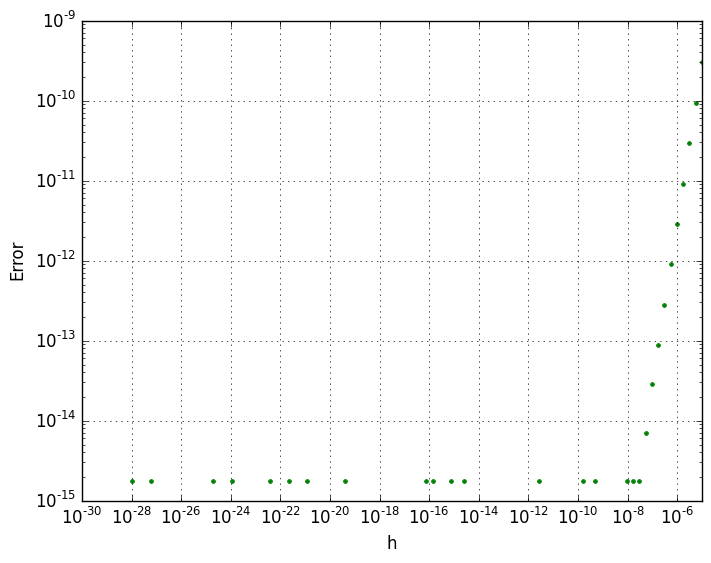

In [135]:
loglog(h_values2,cd_error2, "g.")
xlabel("h")
ylabel("Error")
grid("on")

Una vez más se obtiene lo mismo que la vez pasada por lo que se concluye que el error sí se mantiene constante.

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

Si juntamos las tres gráficas en una para poder comparar directamente, manteniendo el color, obtenemos lo siguiente:

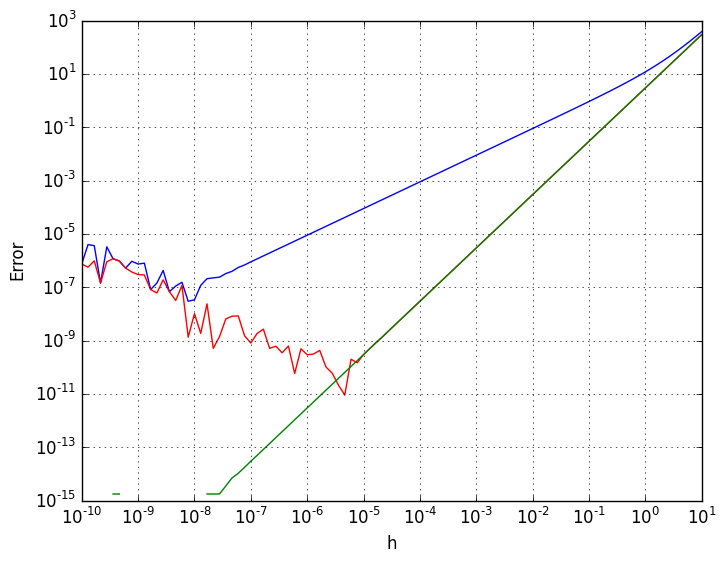

In [110]:
loglog(h_values,rd_error, "b", h_values, sd_error, "r", h_values, cd_error, "g")
xlabel("h")
ylabel("Error")
grid("on")

Lo que se concluye de comparar los tres errores es que la derivada compleja arroja el valor más exacto ya que el error mínimo que se alcanza es del orden de $10^{15}$, mientras que para la derivada simétrica es de $10^{10}$, y el de la derivada por la derecha es del orden de $10^{7}$. Adicionalmente estos dos últimos tienen el comportamiento peculiar de que después de valor de h el error comienza a aumentar en lugar de disminuir.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Es bastante 'espeluznante' pensar que a diferencia de lo que sucede en cálculo de que al hacer $h \rightarrow 0$ no obtenemos que la derivada se acerca cada vez más a su valor real. Esta discrepancia con el cálculo de variables continuas se debe justo a que la computadora tiene cierta precisión por lo que arrastra un error numérico. Es éste el culpable de que a partir de determinado valor de h, el error aumente o se mantenga constante.